In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data


* Read companies.csv file and round2-csv file with encoding
* Remove the extra spacing in the beginning and ending of permalink in both dataframes
* Rename the column name to company_permalink in companies table
* Join the two dataframes and create master_frame

In [296]:
# Read both csv files
companies = pd.read_csv('companies.csv',encoding='mbcs')
round2= pd.read_csv('rounds2.csv',encoding='mbcs')

In [297]:
# Remove the extra spacing in the beginning and ending 
companies.permalink = companies.permalink.apply(lambda x : x.lower().strip())
round2.company_permalink = round2.company_permalink.apply(lambda x : x.lower().strip())

In [298]:
# rename the column name to company_permalink in companies table
companies=companies.rename(columns = {'permalink' :'company_permalink'})

In [299]:
companies.shape

(66368, 10)

In [300]:
round2.shape

(114949, 6)

In [301]:
# 1.1 How many unique companies are present in rounds2?
len(set(round2.company_permalink))

66368

In [302]:
# 1.2 How many unique companies are present in companies?
len(set(companies.company_permalink))

66368

In [303]:
# 1.4 Are there any companies in the rounds2 file which are not present in companies? 
#Answer yes or no: Y/N
# Approach : get the difference in company_permalink set and print Y and N
if(len(set(round2.company_permalink)-set(companies.company_permalink)) ==0):
    print('N')
else :
    print('Y')

N


In [304]:
# Join the two dataframes
master_frame=pd.merge(companies,round2,on='company_permalink', how='inner')

In [305]:
# 1.5 How many observations are present in master_frame
master_frame.shape

(114949, 15)

## Data Cleaning

1. Check if there are rows having country_code as null but state_code, city,region as not null .If no such rows are found then we can remove these columns as we intrested in country_code only. 
2. Removing columns like homepage_url ,funding_round_permalink,founded_at which are unique to company and are not required in analysis.
3. Removing column funding_round_code as we are not interested on specific round
4. Remove rows which are not having raised_amount_usd as null
5. Transform amount in USD to amount in million USD notation.
6. Remove rows not having country code.
7. Remove rows not having category_list.
8. Remove rows which are having status as closed.
9. Change the data type of funded_at column.
10. Create a new column which has the total investments of the company(sum of all rounds investment for that company)
11. Sort the dataframe based on funded_at

In [306]:
# check Columns present in master_frame 
master_frame.columns

Index(['company_permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

In [307]:
#Checking if there are any rows where country is null and state_code is not null
master_frame[master_frame.country_code.isnull()].state_code.notnull().sum()

0

In [308]:
#Checking if there are any rows where country is null and region is not null
master_frame[master_frame.country_code.isnull()].region.notnull().sum()

0

In [309]:
#Checking if there are any rows where country is null and city is not null
master_frame[master_frame.country_code.isnull()].city.notnull().sum()

0

In [310]:
len(set(master_frame.funding_round_permalink))/ len(master_frame.index)

1.0

In [311]:
master_frame = master_frame.drop(columns=['homepage_url','state_code','region', 'city','funding_round_permalink','founded_at','funding_round_code'])

In [312]:
master_frame.columns

Index(['company_permalink', 'name', 'category_list', 'status', 'country_code',
       'funding_round_type', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [313]:
# Analysing the number of  null values per column
master_frame.isnull().sum()

company_permalink         0
name                      1
category_list          3410
status                    0
country_code           8678
funding_round_type        0
funded_at                 0
raised_amount_usd     19990
dtype: int64

In [314]:
# As we are interested in finding the raised_amount_usd to be in 5 Million to 15 Million.
#We drop the rows where amount is null
master_frame= master_frame[~master_frame.raised_amount_usd.isnull()]

In [315]:
master_frame.shape

(94959, 8)

In [316]:
#Transform amount in USD to amount in million USD notation
master_frame.raised_amount_usd = master_frame.raised_amount_usd.apply(lambda x :round( (x/1000000),2))

In [317]:

master_frame.country_code.isnull().sum()

5851

In [318]:
# Remove the rows having country_code null
master_frame = master_frame[~master_frame.country_code.isnull()]

In [319]:
master_frame.isnull().sum()

company_permalink       0
name                    1
category_list         579
status                  0
country_code            0
funding_round_type      0
funded_at               0
raised_amount_usd       0
dtype: int64

In [320]:
# Remove the rows having category_list null
master_frame = master_frame[~master_frame.category_list.isnull()]

In [321]:
master_frame.isnull().sum()

company_permalink     0
name                  1
category_list         0
status                0
country_code          0
funding_round_type    0
funded_at             0
raised_amount_usd     0
dtype: int64

In [322]:
master_frame.status.value_counts()

operating    69041
acquired      9811
closed        5683
ipo           3994
Name: status, dtype: int64

In [323]:
# Removing rows having status as closed
master_frame= master_frame[~(master_frame.status=='closed')]

In [324]:
master_frame.status.value_counts()

operating    69041
acquired      9811
ipo           3994
Name: status, dtype: int64

In [325]:
master_frame.isnull().sum()

company_permalink     0
name                  0
category_list         0
status                0
country_code          0
funding_round_type    0
funded_at             0
raised_amount_usd     0
dtype: int64

In [326]:
master_frame.shape

(82846, 8)

In [327]:
#28 percent rows are removed as part of data cleaning
(114949-82846)/114949 

0.2792803765148022

In [328]:
# change funded_at
import datetime
master_frame.funded_at = master_frame.funded_at.apply(lambda x :datetime.datetime.strptime(x, "%d-%m-%Y").date() )

In [329]:
master_frame.head()

,company_permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,venture,2015-01-05,10.00
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,seed,2014-03-01,0.70
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,venture,2008-03-19,2.00
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,undisclosed,2014-07-01,0.04
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,seed,2009-09-11,0.04


In [330]:
master_frame.shape

(82846, 8)

In [331]:
# get sum of amounts raised by a company
totals=pd.DataFrame(master_frame.groupby('company_permalink')['raised_amount_usd'].sum())

In [332]:
totals.reset_index()
totals= totals.rename(columns={'raised_amount_usd':'total_amount_invested'})

In [333]:
# add the total_amount_invested to master_frame
master_frame= master_frame.merge(totals,how='inner',on='company_permalink')

In [334]:
# sort the dataframe based on funded_at
master_frame= master_frame.sort_values(by='funded_at', ascending= False)

In [335]:
master_frame.shape

(82846, 9)

## Funding Type Analysis


1. Get rows having funding_type as either venture or seed or angel or private_equity
2. Analyze mean, median(most representative value) and length for the four funding types
3. Choose the investment type based on the requirement(5 millions to 15 millions USD)
4. Choose companies having their latest funding round type(based on recent funded_at date) as the above investment type.

In [336]:
# Funding types we are interested in 
funding_types=['venture','seed','angel','private_equity']

In [337]:
master_frame= master_frame[master_frame.funding_round_type.isin(funding_types)]

In [338]:
master_frame.shape

(70162, 9)

In [339]:
# analyze mean , median and length of the four funding types
df1=master_frame.groupby('funding_round_type')['raised_amount_usd'].agg([np.mean,np.median,len]).apply(lambda x : round(x,2))

In [340]:
df1=df1.rename(columns ={'mean':'Mean','median':'Median'})

In [341]:
df1.head()

,Mean,Median,len
funding_round_type,,,
angel,1.00,0.42,3960.0
private_equity,75.98,21.00,1723.0
seed,0.76,0.31,19731.0
venture,11.89,5.00,44748.0


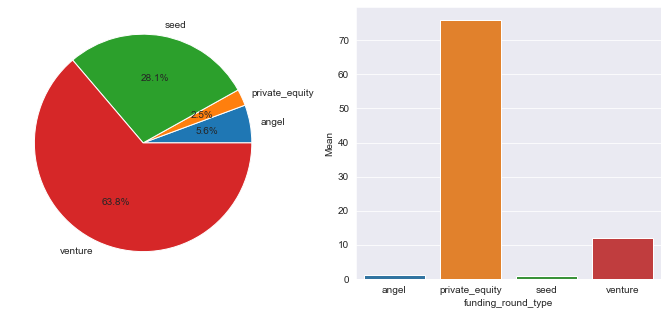

In [342]:
fig = plt.figure()
fig.set_size_inches(12, 5)
plt.subplot(1, 2, 1)
plt.pie(df1.len,labels=df1.index,autopct= '%1.1f%%')

plt.subplot(1, 2, 2)
sns.set_style(style="darkgrid")
ax = sns.barplot(x=df1.index, y=df1.Mean)
plt.show()


 * As Venture funding has average funding between 5 to 15 Million USD, we will be using rows having Venture as funding_type

In [343]:
# Create datframe which has the lastest fund raised per company
df_latest_funding_at=master_frame.groupby('company_permalink').head(1)

In [344]:
df_latest_funding_at.shape

(40425, 9)

In [345]:
# choosing companies only having funding_round_type as venture
#(To avoid companies which are current having funding_round_type as private_equity)
df_latest_funding_as_venture= df_latest_funding_at[df_latest_funding_at['funding_round_type']=='venture']

In [346]:
df_latest_funding_as_venture.to_csv('2.csv',index = False, header=True)

In [347]:
df_latest_funding_as_venture.shape

(24559, 9)

In [348]:
df_latest_funding_as_venture.head()

,company_permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd,total_amount_invested
38100,/organization/keypair-inc,"Keypair, Inc.",FinTech,operating,KOR,venture,2015-12-05,5.0,5.00
51055,/organization/onovative,Onovative,Banking|Enterprise Software|Financial Services...,operating,USA,venture,2015-12-04,1.2,1.60
57009,/organization/prosetta,Prosetta,Biotechnology,operating,USA,venture,2015-12-04,31.0,35.04
40508,/organization/lindacare,LindaCare,Health Care,operating,BEL,venture,2015-12-04,1.6,1.60
57214,/organization/proversity,Proversity,Education|Internet|Recruiting,operating,GBR,venture,2015-12-04,1.5,1.69


In [349]:
# create data frame with companies having funding_round_type as venture and 
#companies are in df_latest_funding_as_venture 
master_frame = master_frame[(master_frame.funding_round_type=='venture') & (master_frame.company_permalink.isin(df_latest_funding_as_venture.company_permalink))]

In [350]:
master_frame.shape

(43255, 9)

## Country analysis

1. Top 9 countries based on the total investment amount each country has received
2. Create a list of of english_speaking_countries from wikipedia link shared. 
3. Get top3 english speaking countries out of top9 using above list.
4. Reduce dataframe to have data from these three countries.

In [351]:
# Top 9 countries based on the total investment amount each country has received
top9_countries=pd.DataFrame(master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9))

In [352]:
top9_countries=top9_countries.reset_index()
top9_countries

,country_code,raised_amount_usd
0,USA,375525.31
1,CHN,36280.04
2,GBR,17638.32
3,IND,10972.74
4,CAN,8591.16
5,FRA,6616.20
6,ISR,6338.00
7,DEU,5871.80
8,JPN,3155.92


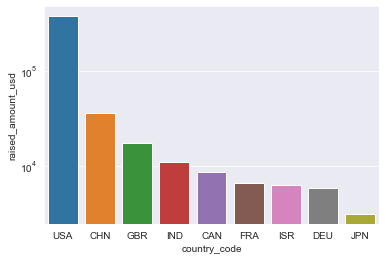

In [353]:
# A plot showing the top 9 countries against the total amount of investments of funding type FT
fig = plt.figure()
ax=sns.barplot(x=top9_countries.country_code, y= top9_countries.raised_amount_usd)
ax.set_yscale('log')
plt.show()

In [354]:
# created list out of english_speaking_countries 
english_speaking_countries=['ATG','BHS','BRB','BLZ','CAN','DMA','FJI','GHA','GRD','GUY','IRL','JAM','KEN','LBR','NGA','PNG','PHL','KNA','LCA','VCT','SLE','SGP','ZAF','TTO','AUS','NZL','GBR','USA','IND']

In [355]:
# get top 3 countries
top3=top9_countries[top9_countries.country_code.isin(english_speaking_countries)].country_code.head(3)

In [356]:
top3

0    USA
2    GBR
3    IND
Name: country_code, dtype: object

In [357]:
# Analysing the data of these three countries only
master_frame= master_frame[master_frame.country_code.isin(top3)]

In [358]:
# Remaining rows after completing country analysis
master_frame.shape

(35011, 9)

# Sector Analysis -1

1. Read mapping.csv file 
2. Remove rows having category_list as NaN
3. Drop the Blanks column
4. Treat category_list having 0 in their name
5. Use melt method to deduce main_sector
6. Create primary_sector in master_frame
7. Remove rows which don't have a main_sector

In [359]:
# Read mapping.csv file
sectors =pd.read_csv('mapping.csv')

In [360]:
sectors.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [361]:
# check if there are rowis having category_list as null
sectors.category_list.isnull().sum()

1

In [362]:
sectors.shape

(688, 10)

In [363]:
# Drop row having Nan
sectors=sectors.dropna()

In [364]:
# Checking if all rows are having Blanks as 0
len(sectors[sectors['Blanks']==0])== len(sectors.index)

True

In [365]:
# removing the column as all the values are zeroes
sectors=sectors.drop(columns='Blanks')

In [366]:
# ceate a method to treat category_list having 0 in the name
def zeroReplacement(category):
    if category.startswith('0'): 
        category=category.replace('0','Na') # replace category starting with 0 with Na 
    else: 
        category=category.replace('0','na') # replace category not starting with 0 and having 0 with na
    category=category.replace('.na','.0')# replace .na with .0 as .0 is valid
    return  category 

In [367]:
#apply zeroReplacement method on category_list
sectors.category_list=sectors.category_list.apply(lambda category :  zeroReplacement(category))

In [368]:
# use melt method to deduce main_sector 
sectors=pd.melt(sectors,id_vars='category_list',var_name='main_sector').query('value ==1')

In [369]:
# drop the value column
sectors=sectors.drop(columns='value')

In [370]:
sectors.head()

,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [371]:
# Get primary_sector from primary_sector
master_frame['primary_sector'] = master_frame.category_list.apply(lambda x : x.split('|')[0])

In [372]:
master_frame.head()

,company_permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd,total_amount_invested,primary_sector
51055,/organization/onovative,Onovative,Banking|Enterprise Software|Financial Services...,operating,USA,venture,2015-12-04,1.2,1.60,Banking
57009,/organization/prosetta,Prosetta,Biotechnology,operating,USA,venture,2015-12-04,31.0,35.04,Biotechnology
57214,/organization/proversity,Proversity,Education|Internet|Recruiting,operating,GBR,venture,2015-12-04,1.5,1.69,Education
62763,/organization/seamlessdocs,SeamlessDocs,Enterprise Software|Government Innovation|Proj...,operating,USA,venture,2015-12-04,5.0,6.45,Enterprise Software
79395,/organization/welltok,Welltok,Health and Wellness,operating,USA,venture,2015-12-03,45.0,129.99,Health and Wellness


In [373]:
master_frame.shape

(35011, 10)

In [374]:
# add main_sector to master_frame using pd.merge function
master_frame= pd.merge(master_frame,sectors, how='left', left_on='primary_sector',right_on='category_list')

In [375]:
master_frame.shape

(35011, 12)

In [376]:
master_frame=master_frame.drop(columns='category_list_y')
master_frame= master_frame.rename(columns={'category_list_x':'category_list'})

In [377]:
master_frame.head()

,company_permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd,total_amount_invested,primary_sector,main_sector
0,/organization/onovative,Onovative,Banking|Enterprise Software|Financial Services...,operating,USA,venture,2015-12-04,1.2,1.60,Banking,"Social, Finance, Analytics, Advertising"
1,/organization/prosetta,Prosetta,Biotechnology,operating,USA,venture,2015-12-04,31.0,35.04,Biotechnology,Cleantech / Semiconductors
2,/organization/proversity,Proversity,Education|Internet|Recruiting,operating,GBR,venture,2015-12-04,1.5,1.69,Education,Others
3,/organization/seamlessdocs,SeamlessDocs,Enterprise Software|Government Innovation|Proj...,operating,USA,venture,2015-12-04,5.0,6.45,Enterprise Software,Others
4,/organization/welltok,Welltok,Health and Wellness,operating,USA,venture,2015-12-03,45.0,129.99,Health and Wellness,Health


In [378]:
master_frame[master_frame.main_sector.isnull()].primary_sector.value_counts()

Adaptive Equipment                 2
Natural Gas Uses                   1
GreenTech                          1
Specialty Retail                   1
Rapidly Expanding                  1
Biotechnology and Semiconductor    1
Name: primary_sector, dtype: int64

In [379]:
# check number of rows having main_sector as null 
master_frame.main_sector.isnull().sum()

7

In [380]:
# remove rows having main_sector as null
master_frame = master_frame[~master_frame.main_sector.isnull()]

In [381]:
# check the shape after removing rows
master_frame.shape

(35004, 11)

# Sector Analysis 2

1. Retain rows having raised_amount_usd between 5 and 15 million (both Inclusive)
2. Create D1, D2,D3 for Country1, Country2 , Country3
3. Add total number (or count) of investments for each main sector in D1, D2,D3 dataframes
4. Add total amount invested in each main sector in D1, D2,D3 dataframes.

In [382]:
# Retain rows having raised_amount_usd between 5 and 15 million (both Inclusive)
master_frame= master_frame[(master_frame['raised_amount_usd'] >=5) & (master_frame['raised_amount_usd'] <=15)]

In [383]:
# check the shape after removing rows
master_frame.shape

(11826, 11)

In [384]:
# 3 countries of our choice
master_frame.country_code.value_counts()

USA    10944
GBR      573
IND      309
Name: country_code, dtype: int64

In [385]:
# Data of the first country
D1= master_frame[master_frame.country_code=='USA']

In [386]:
D1.shape

(10944, 11)

In [387]:
# Data of the second country
D2= master_frame[master_frame.country_code=='GBR']

In [388]:
# Data of the third country
D3= master_frame[master_frame.country_code=='IND']

In [389]:
# Get the sum of the amount and count of each main_sector
D1_aggr=D1.groupby('main_sector')['raised_amount_usd'].agg([np.sum,len])

In [390]:
# Add the sum and count to D1 dataframe
D1=D1.merge(D1_aggr,how="inner",on="main_sector")

In [391]:
# Get the sum of the amount and count of each main_sector
D2_aggr= D2.groupby('main_sector')['raised_amount_usd'].agg([np.sum,len])

In [392]:
# Add the sum and count to D2 dataframe
D2=D2.merge(D2_aggr,how="inner",on="main_sector")

In [393]:
# Get the sum of the amount and count of each main_sector
D3_aggr= D3.groupby('main_sector')['raised_amount_usd'].agg([np.sum,len])

In [394]:
# Add the sum and count to D3 dataframe
D3=D3.merge(D3_aggr,how="inner",on="main_sector")

In [395]:
#Total number of investments in C1
len(D1.index)

10944

In [396]:
#Total number of investments in C2
len(D2.index)

573

In [397]:
#Total number of investments in C3
len(D3.index)

309

In [398]:
#Total amount of investment in USD in C1
round(D1.raised_amount_usd.sum() * pow(10,6))

97891130000.0

In [399]:
#Total amount of investment in USD in C2
round(D2.raised_amount_usd.sum() * pow(10,6))

4975300000.0

In [400]:
#Total amount of investment in USD in C3
round(D3.raised_amount_usd.sum()* pow(10,6))

2760680000.0

In [401]:
# Create dataframe containing top3 sectors of each country
top3_D1=pd.DataFrame(D1.main_sector.value_counts().sort_values(ascending=False).head(3))
top3_D1['country_code']='USD'
top3_D2=pd.DataFrame(D2.main_sector.value_counts().sort_values(ascending=False).head(3))
top3_D2['country_code']='GBR'
top3_D3=pd.DataFrame(D3.main_sector.value_counts().sort_values(ascending=False).head(3))
top3_D3['country_code']='IND'
top3=pd.concat([top3_D1,top3_D2,top3_D3],axis=0)

In [402]:
top3

,main_sector,country_code
Others,2694,USD
"Social, Finance, Analytics, Advertising",2527,USD
Cleantech / Semiconductors,2080,USD
Others,139,GBR
"Social, Finance, Analytics, Advertising",126,GBR
Cleantech / Semiconductors,115,GBR
Others,101,IND
"Social, Finance, Analytics, Advertising",56,IND
"News, Search and Messaging",48,IND


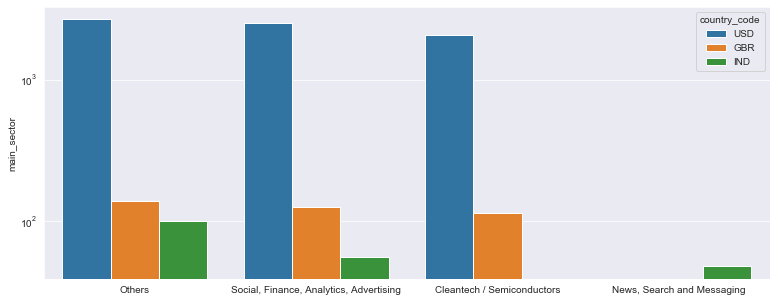

In [403]:
# Plot the data
fig = plt.figure()
fig.set_size_inches(13, 5)
ax = plt.gca()
sns.barplot(x=top3.index, y=top3.main_sector,hue=top3.country_code)
ax.set_yscale('log')

In [404]:
#top sector count-wise (point 3), which company received the highest investment
D1[D1.main_sector=='Others'].sort_values(by=['total_amount_invested','raised_amount_usd'], ascending=False).head(1)

,company_permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd,total_amount_invested,primary_sector,main_sector,sum,len
717,/organization/snapchat,Snapchat,File Sharing|Messaging|Mobile|Photography,operating,USA,venture,2013-02-08,12.5,1185.58,File Sharing,Others,24072.36,2694.0


In [405]:
#For the second-best sector count-wise (point 4), which company received the highest investment
D1[D1.main_sector=='Social, Finance, Analytics, Advertising'].sort_values(by=['total_amount_invested','raised_amount_usd'], ascending=False).head(1)

,company_permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd,total_amount_invested,primary_sector,main_sector,sum,len
4893,/organization/mediavast,MediaVast,Advertising|Broadcasting|Content,acquired,USA,venture,2006-05-17,15.0,4715.0,Advertising,"Social, Finance, Analytics, Advertising",22250.97,2527.0


In [406]:
D2.main_sector.value_counts().sort_values(ascending=False)

Others                                     139
Social, Finance, Analytics, Advertising    126
Cleantech / Semiconductors                 115
News, Search and Messaging                  63
Entertainment                               53
Manufacturing                               39
Health                                      22
Automotive & Sports                         16
Name: main_sector, dtype: int64

In [407]:
#top sector count-wise (point 3), which company received the highest investment
D2[D2.main_sector=='Others'].sort_values(by=['total_amount_invested','raised_amount_usd'], ascending=False).head(1)

,company_permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd,total_amount_invested,primary_sector,main_sector,sum,len
137,/organization/picochip,picoChip,Software,acquired,GBR,venture,2001-01-01,7.0,120.5,Software,Others,1217.63,139.0


In [408]:
D2[D2.main_sector=='Social, Finance, Analytics, Advertising'].sort_values(by=['total_amount_invested','raised_amount_usd'], ascending=False).head(1)

,company_permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd,total_amount_invested,primary_sector,main_sector,sum,len
222,/organization/borro,Borro,Finance|Technology,operating,GBR,venture,2011-04-04,12.07,171.57,Finance,"Social, Finance, Analytics, Advertising",1040.15,126.0


In [409]:
D3.main_sector.value_counts().sort_values(ascending=False)

Others                                     101
Social, Finance, Analytics, Advertising     56
News, Search and Messaging                  48
Entertainment                               32
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      18
Automotive & Sports                         13
Name: main_sector, dtype: int64

In [410]:
#top sector count-wise (point 3), which company received the highest investment
D3[D3.main_sector=='Others'].sort_values(by=['total_amount_invested','raised_amount_usd'], ascending=False).head(1)

,company_permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd,total_amount_invested,primary_sector,main_sector,sum,len
72,/organization/myntra,Myntra,E-Commerce,acquired,IND,venture,2011-03-04,14.0,158.75,E-Commerce,Others,918.29,101.0


In [411]:
#For the second-best sector count-wise (point 4), which company received the highest investment
D3[D3.main_sector=='Social, Finance, Analytics, Advertising'].sort_values(by=['total_amount_invested','raised_amount_usd'], ascending=False).head(1)

,company_permalink,name,category_list,status,country_code,funding_round_type,funded_at,raised_amount_usd,total_amount_invested,primary_sector,main_sector,sum,len
220,/organization/shopclues-com,ShopClues.com,Consumer Internet|E-Commerce|Shopping,operating,IND,venture,2014-03-01,15.0,131.25,Consumer Internet,"Social, Finance, Analytics, Advertising",507.55,56.0
